<a href="https://ibb.co/gTC2hm6"><img src="https://i.ibb.co/r6JjNFv/logo-with-words-4x.png" alt="logo-with-words-4x" border="0"></a>
<center>Test task by Ruslan Alykov</center>

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot
%matplotlib inline

In [2]:
users = pd.read_csv('users_asa_feb_flitered.csv')

In [3]:
costs = pd.read_csv('costs_asa_campaign_filtered.csv')

In [4]:
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize':(25,10)})

## Разведывательный анализ

In [5]:
users.head()

,user_id,lang,pro,product,price,sail,kite,wind,surf,fish,snow,other,source,campaign,install_date
0,FA64312F-273A-41AB-BB9C-DB43AFE5B760,de_PL,0,NaN,NaN,0,0,0,0,0,0,1,Apple Search Ads,PL Discovery,01.02.2023
1,3FF6E426-B5D5-4C8B-A915-9FB58464EA50,en_NZ,0,NaN,NaN,1,0,0,0,1,0,0,Apple Search Ads,NZ Common_,01.02.2023
2,9C82BE9F-0212-47EA-872F-AF7237D43064,en_CA,1,co.windyapp.pro_sub_year_50_notrial,50.0,1,0,0,0,1,0,0,Apple Search Ads,CA Common_,01.02.2023
3,750657AF-3BB4-457A-9BBA-BE691CA5A75C,en_AR,0,NaN,NaN,0,1,0,0,0,0,0,Apple Search Ads,AR Skag,01.02.2023
4,A417C7DE-229E-4BB3-8BF0-17FA6883535E,ru_UA,0,NaN,NaN,0,0,0,0,0,0,1,Apple Search Ads,UA SKAG,01.02.2023


In [6]:
costs.head()

,Date,Campaign,Cost
0,2023-02-01,US Common_,"89,22"
1,2023-02-01,NZ Common_,"21,54"
2,2023-02-01,DE Common_,"18,15"
3,2023-02-01,UK Common_,"11,21"
4,2023-02-01,FR Common_,"7,83"


**Размер данных**

In [7]:
users.shape

(6308, 15)

In [8]:
costs.shape

(2802, 3)

In [9]:
users.size

94620

In [10]:
costs.size

8406

In [11]:
users.dtypes

user_id          object
lang             object
pro               int64
product          object
price           float64
sail              int64
kite              int64
wind              int64
surf              int64
fish              int64
snow              int64
other             int64
source           object
campaign         object
install_date     object
dtype: object

In [12]:
costs.dtypes

Date        object
Campaign    object
Cost        object
dtype: object

**Переведем дату в формат даты**

In [13]:
users['install_date'] = pd.to_datetime(users['install_date'], dayfirst=True)

In [14]:
costs['Date'] = pd.to_datetime(costs['Date'])

**Посчитаем пустые значения**

In [15]:
users.isna().sum()

user_id            0
lang             100
pro                0
product         6081
price           6081
sail               0
kite               0
wind               0
surf               0
fish               0
snow               0
other              0
source             0
campaign           0
install_date       0
dtype: int64

In [16]:
costs.isna().sum()

Date        0
Campaign    0
Cost        0
dtype: int64

**Описательные статистики**

In [17]:
users.describe()

,pro,price,sail,kite,wind,surf,fish,snow,other
count,6308.000000,227.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000,6308.000000
mean,0.038681,70.044053,0.155992,0.033291,0.032815,0.072289,0.191503,0.057546,0.304217
std,0.192849,30.453763,0.362877,0.179410,0.178167,0.258987,0.393515,0.232901,0.460111
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,180.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
costs.describe(include=[object])

,Campaign,Cost
count,2802,2802
unique,107,643
top,US Common_,"0,07"
freq,28,53


**Уникальные кампании**

In [19]:
costs.Campaign.unique()

array(['US Common_', 'NZ Common_', 'DE Common_', 'UK Common_',
       'FR Common_', 'AU SKAG_', 'CA Common_', 'JP Common_', 'GR SKAG',
       'NL Common_', 'ZA Discovery', 'MX SKAG', 'IL Discovery', 'MY SKAG',
       'PL SKAG', 'ID SKAG', 'AU Discovery', 'CH Common_', 'AR Discovery',
       'SA SKAG', 'SP Common_', 'VN SKAG', 'CZ SKAG', 'DK SKAG',
       'PL Discovery', 'EG Discovery', 'IT Common_', 'PH SKAG',
       'HK Discovery', 'KR SKAG_', 'AT Common_', 'NW Common_',
       'TH Discovery', 'CZ Discovery', 'BE SKAG', 'LB Discovery',
       'BE Discovery', 'DK Discovery', 'ZA SKAG', 'ID Discovery',
       'KH Discovery', 'UA Discovery', 'JO Discovery', 'CL Common_',
       'CO Discovery', 'AR Skag', 'MY Discovery', 'KZ Discovery',
       'US_prod_page', 'SE Discovery', 'TH SKAG', 'UA SKAG',
       'PK Discovery', 'QA Discovery', 'IL SKAG', 'RO SKAG',
       'AL Discovery', 'FI Discovery', 'MX Discovery', 'GR Discovery',
       'SG Discovery', 'RO Discovery', 'TW SKAG', 'KW Discovery

**Уникальные юзеры**

In [20]:
users.user_id.nunique()

6308

В данном случае все строки датафрейма users являются уникальными

## Задача №1

- **Найти, как минимум, две кампании, в рамках которых происходило что-то странное, и попробовать объяснить причину.**

In [21]:
costs = costs.rename(columns={'Campaign': 'campaign'})

Для дальнейшего анализа нужно перевести столбец Cost из строкового в число с плавающей точкой.

In [22]:
costs.Cost = costs.Cost.str.replace(',', '.')

In [23]:
costs.Cost = costs.Cost.astype('float64')

Взглянем на динамику кампаний по дате

<AxesSubplot:xlabel='Date', ylabel='Cost'>

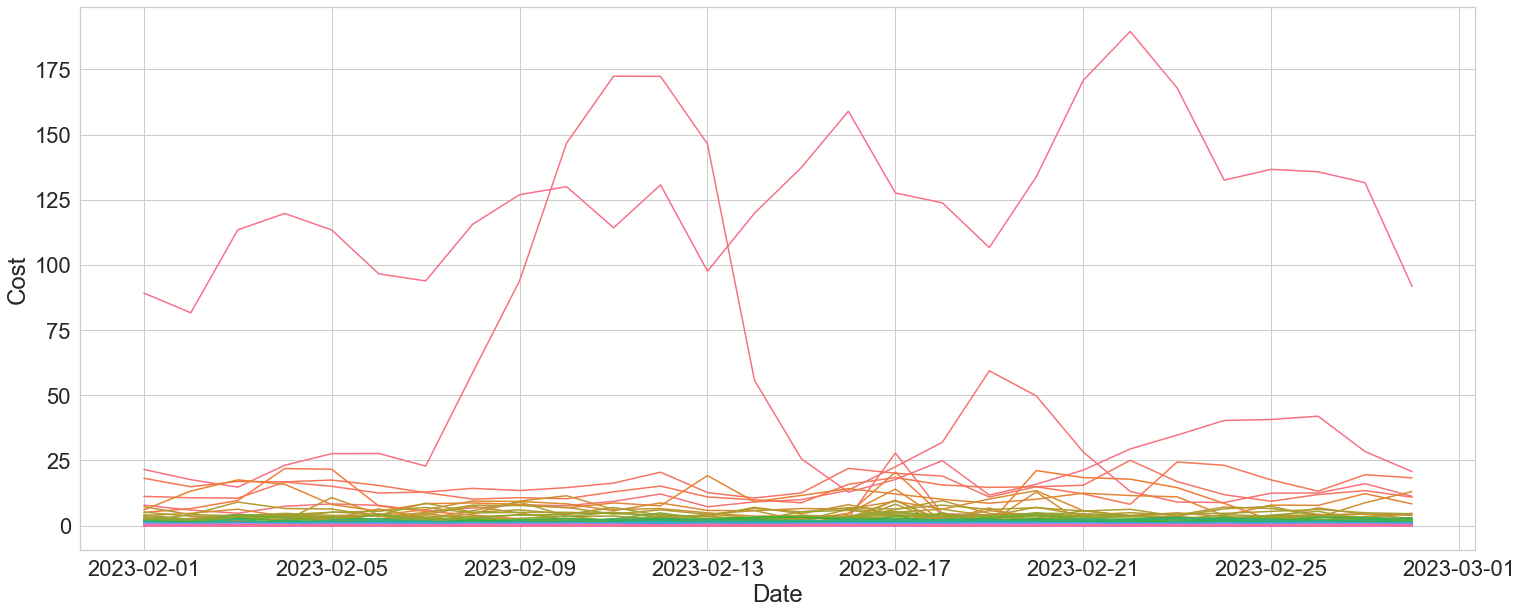

In [24]:
df_sort = costs.groupby(['campaign', 'Date'], as_index=False).agg({'Cost': 'sum'}).sort_values('Cost', ascending=False)
sns.lineplot(data=df_sort, x='Date', y='Cost', hue = 'campaign', legend=False) # поставить legend = True что бы посмотреть легенду

In [25]:
costs\
    .groupby('campaign', as_index=False)\
    .agg({'Cost': 'sum'})\
    .sort_values('Cost', ascending=False).head(10)

,campaign,Cost
100,US Common_,3487.89
67,NZ Common_,1367.59
19,DE Common_,417.11
29,FR Common_,406.30
98,UK Common_,406.24
12,CA Common_,284.68
105,ZA Discovery,166.81
6,AU SKAG_,151.58
49,JP Common_,148.35
39,ID SKAG,125.60


Выброс по Новой Зеландии

In [26]:
nz_common = costs.query('Date > "2023-02-05" & Date < "2023-02-16" & campaign == "NZ Common_"')

In [27]:
nz_common.head()

,Date,campaign,Cost
504,2023-02-06,NZ Common_,27.68
603,2023-02-07,NZ Common_,22.83
701,2023-02-08,NZ Common_,58.67
801,2023-02-09,NZ Common_,93.95
902,2023-02-10,NZ Common_,146.76


<AxesSubplot:xlabel='Date', ylabel='Cost'>

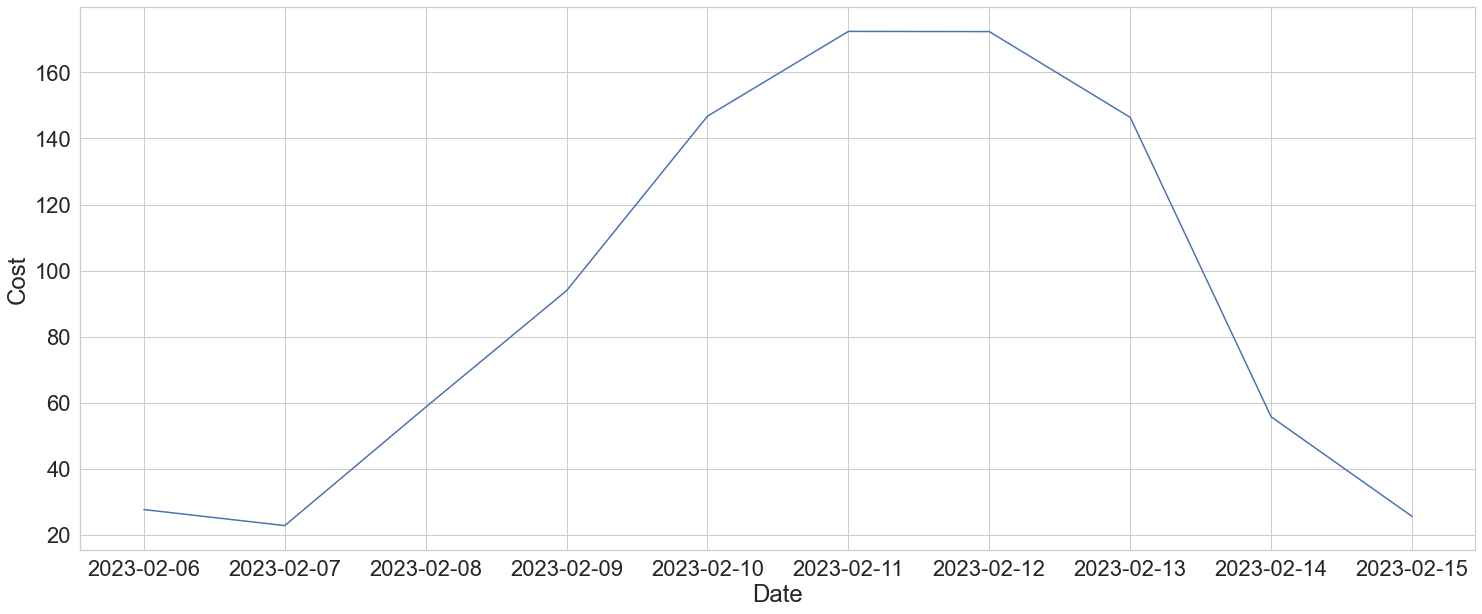

In [28]:
sns.lineplot(data=nz_common, x='Date', y='Cost')

**Видим что подскочила активность пользователей, в эти дни (5-16 февраля) в Новой Зеландии прошел циклон Габриель, предполагаю что пользователи высматривали погоду что бы не угодить под шторм.**<br/>
Ссылки:<br/>
https://en.wikipedia.org/wiki/Cyclone_Gabrielle<br/>
https://www.dw.com/en/cyclone-gabrielle-batters-new-zealand/a-64681409<br/>

Выбросы по США

In [29]:
us_common = costs.query('campaign == "US Common_"')

<AxesSubplot:xlabel='Date', ylabel='Cost'>

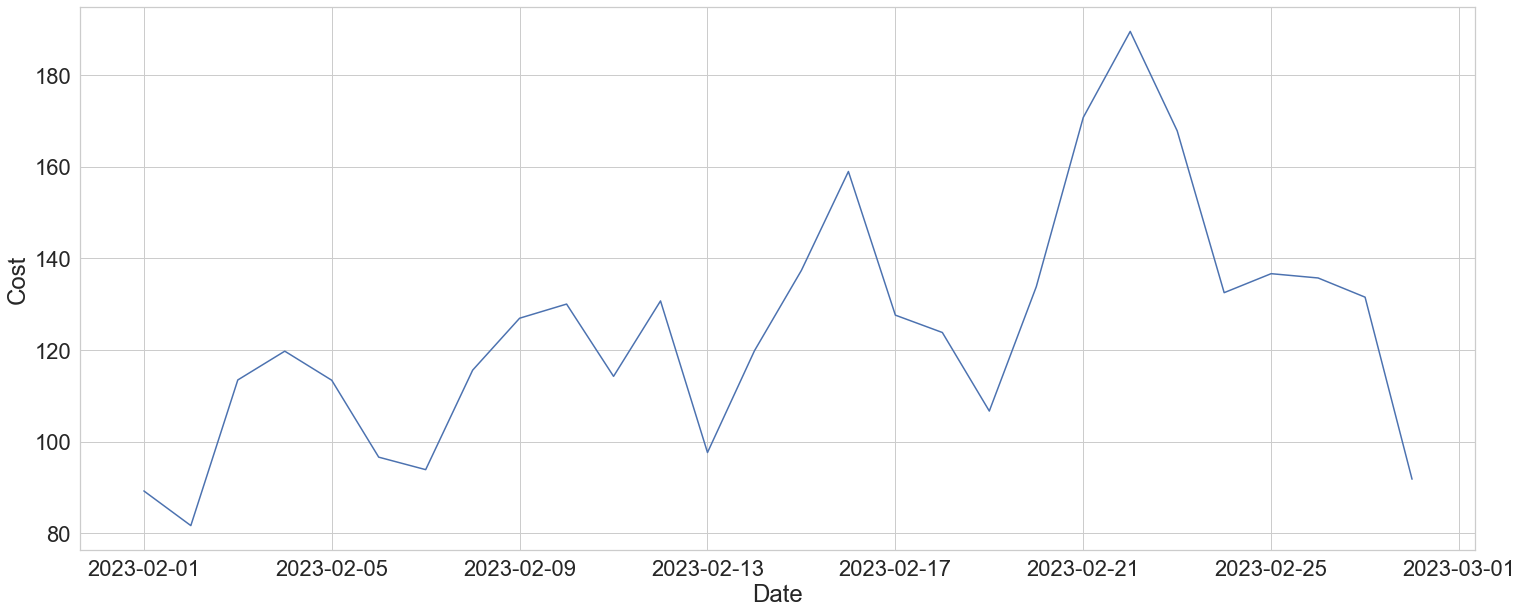

In [30]:
sns.lineplot(data=us_common, x='Date', y='Cost')

По США если не учитывать что люди с этой страны вообще чаще пользуются разного рода приложениями, то ситуация аналогична.<br/>
Например двойной пик 2023-02-23 мог вызвать снежный шторм обрушившийся на США от побережья до побережья. Ссылки:<br/>
https://en.wikipedia.org/wiki/February_2023_North_American_storm_complex<br/>
https://www.weather.gov/dtx/2023-02-22-Winter-Storm<br/>
https://eu.usatoday.com/story/news/weather/2023/02/22/wednesday-forecast-winter-weather-0222/11316127002/<br/>
Пик 2023-02-16 мог быть вызван все той же причиной со снежным штормом, а так же начавшимися торнадо<br/>
https://www.weather.gov/ohx/feb16tors<br/>
В общем неспокойный по погоде в США выдался февраль

Выбросы по Франции

In [31]:
fr_common = costs.query('Date > "2023-02-14" & Date < "2023-02-23" & campaign == "FR Common_"')

<AxesSubplot:xlabel='Date', ylabel='Cost'>

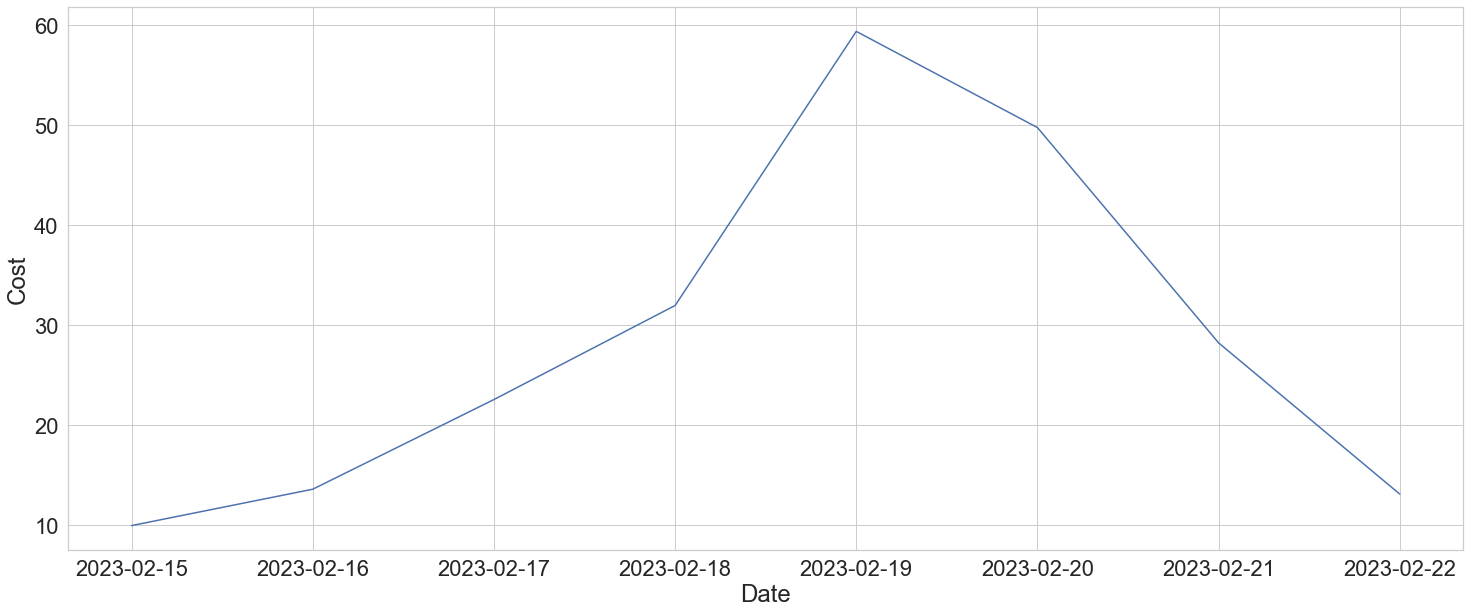

In [32]:
sns.lineplot(data=fr_common, x='Date', y='Cost')

На Францию же обрушились дожди с градом и сильные ветра<br/>
https://newsrnd.com/news/2023-02-17-weather--a-new-cold-snap-expected-in-france-at-the-end-of-next-week.SyZgKluTao.html

**Вывод**<br/>
Учитывая специфику приложения **windy.app** всплески активности в рекламных кампаниях вполне можно объяснить погодными условиями.

 - **Найти три наиболее прибыльные кампании и три наиболее убыточные.**


Создадим новый дф где посчитаем доход по формуле sum(price) - cost = revenue<br/>

In [33]:
df_campaign_price = users\
    .groupby('campaign', as_index=False)\
    .agg({'price': 'sum'})
df_campaign_price.head()

,campaign,price
0,AL Discovery,0.0
1,AL SKAG,0.0
2,AR Discovery,100.0
3,AR Skag,150.0
4,AT Common_,0.0


In [34]:
df_campaign_price.shape

(105, 2)

In [35]:
df_campaign_cost = costs\
    .groupby('campaign', as_index=False)\
    .agg({'Cost': 'sum'})
    
df_campaign_cost.head()

,campaign,Cost
0,AL Discovery,15.70
1,AL SKAG,1.87
2,AR Discovery,56.08
3,AR Skag,24.85
4,AT Common_,28.53


In [36]:
df_campagin_revenue = df_campaign_price.merge(df_campaign_cost, on='campaign')

In [37]:
df_campagin_revenue.shape

(105, 3)

In [38]:
df_campagin_revenue.dtypes

campaign     object
price       float64
Cost        float64
dtype: object

In [39]:
df_campagin_revenue.head()

,campaign,price,Cost
0,AL Discovery,0.0,15.70
1,AL SKAG,0.0,1.87
2,AR Discovery,100.0,56.08
3,AR Skag,150.0,24.85
4,AT Common_,0.0,28.53


In [40]:
df_campagin_revenue['revenue'] = df_campagin_revenue.price - df_campagin_revenue.Cost
df_campagin_revenue.head()

,campaign,price,Cost,revenue
0,AL Discovery,0.0,15.70,-15.70
1,AL SKAG,0.0,1.87,-1.87
2,AR Discovery,100.0,56.08,43.92
3,AR Skag,150.0,24.85,125.15
4,AT Common_,0.0,28.53,-28.53


Проверка по суммам прибыли и убытка с исходными датасетами.

In [67]:
costs.query('campaign == "US Common_"').Cost.sum()

3487.89

In [68]:
users.query('campaign == "US Common_"').price.sum()

8110.0

In [69]:
df_campagin_revenue.query('campaign == "US Common_"').Cost.sum()

3487.89

In [70]:
df_campagin_revenue.query('campaign == "US Common_"').price.sum()

8110.0

Джоин датафйрема прошел корретно

**Топ 3 кампании по прибыли**

In [45]:
df_campagin_revenue\
    .sort_values('revenue', ascending=False)\
    .head(3)

,campaign,price,Cost,revenue
98,US Common_,8110.0,3487.89,4622.11
14,CL Common_,555.0,39.18,515.82
60,MX SKAG,440.0,98.57,341.43


**Топ 3 кампании по убытку**

In [46]:
df_campagin_revenue\
    .sort_values('revenue', ascending=False)\
    .tail(3)

,campaign,price,Cost,revenue
56,LB Discovery,0.0,106.97,-106.97
29,FR Common_,295.0,406.30,-111.30
39,ID SKAG,0.0,125.60,-125.60


- **В разрезе US кампании проанализировать пользователей и найти какие-либо закономерности.**

Одна из закономерностей выявлена выше, американские пользователи начинают массово искать погодные приложения при опасных изменениях погоды. 

In [47]:
df_us = users\
    .query('campaign == "US Common_" or campaign == "US_prod_page" or campaign == "US Search Tab_Return"')

In [48]:
df_us.head()

,user_id,lang,pro,product,price,sail,kite,wind,surf,fish,snow,other,source,campaign,install_date
10,87AF7E44-0DFF-4912-B44D-4F9A32E4A7C5,en_US,1,co.windyapp.2210.pro_sub_year_100_trial7d,100.0,0,0,0,0,1,0,0,Apple Search Ads,US Common_,2023-02-01
11,E2ABD56C-E797-4815-898F-949D514A894A,en_US,0,NaN,NaN,0,0,0,0,0,0,1,Apple Search Ads,US Common_,2023-02-01
13,63909BE8-514B-41AE-93BD-2ABA79B7E15F,fr_FR,0,NaN,NaN,0,1,0,0,0,0,0,Apple Search Ads,US Common_,2023-02-01
19,05195C89-79B6-4CF5-911F-96A366C89DE2,en_US,0,NaN,NaN,0,0,0,0,1,0,0,Apple Search Ads,US Common_,2023-02-01
51,D77E108C-70A5-4865-A65F-87811E1D131D,en_US,0,NaN,NaN,0,0,0,0,0,0,0,Apple Search Ads,US Common_,2023-02-01


In [49]:
df_us.shape

(1224, 15)

In [50]:
df_us.user_id.nunique()

1224

In [51]:
df_us_outdoor_sum = df_us\
    .groupby('pro', as_index=False)\
    [['sail', 'kite', 'surf', 'fish', 'snow', 'other']]\
    .agg('sum')
df_us_outdoor_sum

,pro,sail,kite,surf,fish,snow,other
0,0,199,29,95,274,68,334
1,1,31,0,7,34,6,14


Видим что что больше всего в приложении среди американских пользователей популярна рыбалка (не учитывая **other**), а кайтеры в феврале не купили ни одной **pro** подписки.

In [52]:
df_us['product'].unique()

array(['co.windyapp.2210.pro_sub_year_100_trial7d', nan,
       'co.windyapp.pro_forever_150',
       'co.windyapp.pro_sub_year_60_trial7d',
       'co.windyapp.2210.pro_sub_year_80_notrial',
       'co.windyapp.pro_sub_year_30_notrial',
       'co.windyapp.2110.pro_sub_year_40_notrial',
       'co.windyapp.2110.pro_sub_year_60_trial7d',
       'co.windyapp.2110.pro_sub_month_10_notrial',
       'co.windyapp.pro_sub_year_50_trial7d',
       'co.windyapp.pro_forever_180',
       'co.windyapp.pro_sub_year_35_notrial',
       'co.windyapp.2110.pro_sub_year_60_notrial'], dtype=object)

Количетсво действий с подписками в разрезе по разным продуктам:

In [53]:
df_us\
    .groupby('product', as_index=False)\
    .agg({'user_id': 'count'})\
    .sort_values('user_id', ascending=False)\
    .rename(columns={'user_id': 'action_count'})

,product,action_count
4,co.windyapp.2210.pro_sub_year_100_trial7d,50
5,co.windyapp.2210.pro_sub_year_80_notrial,19
7,co.windyapp.pro_forever_180,5
8,co.windyapp.pro_sub_year_30_notrial,3
1,co.windyapp.2110.pro_sub_year_40_notrial,2
2,co.windyapp.2110.pro_sub_year_60_notrial,2
9,co.windyapp.pro_sub_year_35_notrial,2
0,co.windyapp.2110.pro_sub_month_10_notrial,1
3,co.windyapp.2110.pro_sub_year_60_trial7d,1
6,co.windyapp.pro_forever_150,1


**co.windyapp.2210.pro_sub_year_100_trial7d** самый часто ипользуемый продукт

Пользователи запустившие триальную подписку.<br/> 

In [54]:
unique_trial_users_df = df_us.query('product == "co.windyapp.2210.pro_sub_year_100_trial7d" or product == "co.windyapp.pro_sub_year_60_trial7d" or product == "co.windyapp.pro_sub_year_50_trial7d" or product == "co.windyapp.2110.pro_sub_year_60_trial7d"').user_id.unique()

In [55]:
unique_trial_users_df.size

53

Выяснить сколько из них продили подписку **после триала** на данном датасете нет возможности

Пользователи сразу оплатившие не триальную подписку

In [56]:
unique_notrial_users_df = df_us\
    .query('product == "co.windyapp.2210.pro_sub_year_80_notrial" or product == "co.windyapp.pro_forever_180" or product == "co.windyapp.pro_sub_year_30_notrial" or product == "co.windyapp.2110.pro_sub_year_40_notrial" or product == "co.windyapp.2110.pro_sub_year_60_notrial" or product == "co.windyapp.pro_sub_year_35_notrial" or product == "co.windyapp.2110.pro_sub_month_10_notrial" or product == "co.windyapp.pro_forever_150"')\
    .user_id.unique()
unique_notrial_users_df.size

35

Преобладание в покупках по языковой группе

In [57]:
df_us\
    .groupby('lang', as_index=False)\
    .agg({'price': 'max'})\
    .sort_values('price', ascending=False).head(10)

,lang,price
45,en_US,180.0
9,en_CA,150.0
54,es_US,100.0
50,es_AR,50.0
37,en_PL,35.0
40,en_SA@calendar=gregorian,35.0
0,en,NaN
1,en_AE,NaN
2,en_AF@calendar=gregorian,NaN
3,en_AL,NaN


Количество пользователей включвшие какую-либо **pro** подписку по дате установки

In [58]:
df_us\
    .groupby(['product', 'install_date'], as_index=False)\
    .agg({'user_id': 'count'}).reset_index(drop=True)

,product,install_date,user_id
0,co.windyapp.2110.pro_sub_month_10_notrial,2023-02-09,1
1,co.windyapp.2110.pro_sub_year_40_notrial,2023-02-05,1
2,co.windyapp.2110.pro_sub_year_40_notrial,2023-02-20,1
3,co.windyapp.2110.pro_sub_year_60_notrial,2023-02-16,1
4,co.windyapp.2110.pro_sub_year_60_notrial,2023-02-26,1
5,co.windyapp.2110.pro_sub_year_60_trial7d,2023-02-06,1
6,co.windyapp.2210.pro_sub_year_100_trial7d,2023-02-01,2
7,co.windyapp.2210.pro_sub_year_100_trial7d,2023-02-02,2
8,co.windyapp.2210.pro_sub_year_100_trial7d,2023-02-04,2
9,co.windyapp.2210.pro_sub_year_100_trial7d,2023-02-06,1


Количество установок по дате

In [73]:
df_us\
    .groupby('install_date', as_index=False)\
    .agg({'user_id': 'count'})\
    .sort_values('user_id', ascending=False)

,install_date,user_id
22,2023-02-23,70
20,2023-02-21,69
21,2023-02-22,59
25,2023-02-26,56
16,2023-02-17,54
17,2023-02-18,53
11,2023-02-12,50
8,2023-02-09,48
19,2023-02-20,47
24,2023-02-25,46


Тут снова видим что в даты неспокойной погоды в США пользователи чаще устанавливали приложение, покупали подписку либо использовали триал

Прибыль с покупок пользователей по дате установки

In [60]:
df_us\
    .query('product == "co.windyapp.2210.pro_sub_year_100_trial7d" or product == "co.windyapp.pro_sub_year_60_trial7d" or product == "co.windyapp.pro_sub_year_50_trial7d"')\
    .groupby('install_date', as_index=False)\
    .agg({'price': 'sum'})

,install_date,price
0,2023-02-01,260.0
1,2023-02-02,200.0
2,2023-02-04,200.0
3,2023-02-06,100.0
4,2023-02-07,100.0
5,2023-02-08,300.0
6,2023-02-09,100.0
7,2023-02-10,100.0
8,2023-02-11,100.0
9,2023-02-12,350.0
